# Predictive Model

In [1]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
cwd = os.getcwd()
fcb = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [3]:
fcb = fcb.reset_index(drop=True)
fcb.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [4]:
fcb.shape

(49599, 14)

In [5]:
final_cbf = fcb

In [6]:
final_cbf.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(fcb[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
final_cbf = final_cbf.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(fcb[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
final_cbf = final_cbf.join(encoder_df)

In [8]:
#drop categorical columns now
final_cbf.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [9]:
booking_complete = final_cbf['booking_complete']

In [10]:
final_cbf = final_cbf.drop('booking_complete', axis=1)

In [11]:
booking_complete

0        0
1        0
2        0
3        0
4        0
        ..
49594    0
49595    0
49596    0
49597    0
49598    0
Name: booking_complete, Length: 49599, dtype: int64

# Normalizaing the values

In [12]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(final_cbf)

In [13]:
scaled_df

array([[ 0.4060384 ,  2.10663735, -0.12226628, ...,  0.10111705,
        -0.04841735, -0.08856329],
       [-0.57678813,  0.34929432, -0.09282557, ...,  0.10111705,
        -0.04841735, -0.08856329],
       [ 0.4060384 ,  1.88404057, -0.03394416, ...,  0.10111705,
        -0.04841735, -0.08856329],
       ...,
       [-0.57678813, -0.68168025, -0.50499546, ...,  0.10111705,
        -0.04841735, -0.08856329],
       [-0.57678813, -0.78712084, -0.50499546, ...,  0.10111705,
        -0.04841735, -0.08856329],
       [-0.57678813, -0.74025836, -0.50499546, ...,  0.10111705,
        -0.04841735, -0.08856329]])

In [14]:
scaled_df = pd.DataFrame(scaled_df, columns = final_cbf.columns)

In [15]:
scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,0.406038,2.106637,-0.122266,-0.381112,1.099679,0.701469,-0.651302,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563
1,-0.576788,0.349294,-0.092826,-1.120874,1.099679,-1.425580,-0.651302,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563
2,0.406038,1.884041,-0.033944,1.468294,-0.408797,0.701469,1.535386,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563
3,-0.576788,0.161844,0.231022,-0.935934,1.099679,-1.425580,-0.651302,1.155495,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563
4,0.406038,-0.166193,-0.033944,1.098413,-0.408797,0.701469,-0.651302,1.155495,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563


In [16]:
scaled_df["booking_complete"]= booking_complete

In [17]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,booking_complete
0,0.406038,2.106637,-0.122266,-0.381112,1.099679,0.701469,-0.651302,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
1,-0.576788,0.349294,-0.092826,-1.120874,1.099679,-1.425580,-0.651302,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
2,0.406038,1.884041,-0.033944,1.468294,-0.408797,0.701469,1.535386,-0.865430,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
3,-0.576788,0.161844,0.231022,-0.935934,1.099679,-1.425580,-0.651302,1.155495,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
4,0.406038,-0.166193,-0.033944,1.098413,-0.408797,0.701469,-0.651302,1.155495,-1.173139,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49594,0.406038,-0.646533,-0.504995,-0.011231,1.099679,0.701469,-0.651302,1.155495,-1.106403,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
49595,-0.576788,0.337579,-0.504995,-0.935934,1.602505,-1.425580,-0.651302,-0.865430,-1.106403,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
49596,-0.576788,-0.681680,-0.504995,2.392997,1.099679,-1.425580,-0.651302,1.155495,-1.106403,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
49597,-0.576788,-0.787121,-0.504995,0.358650,-1.414448,0.701469,-0.651302,1.155495,-1.106403,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0


# Correlation matrix

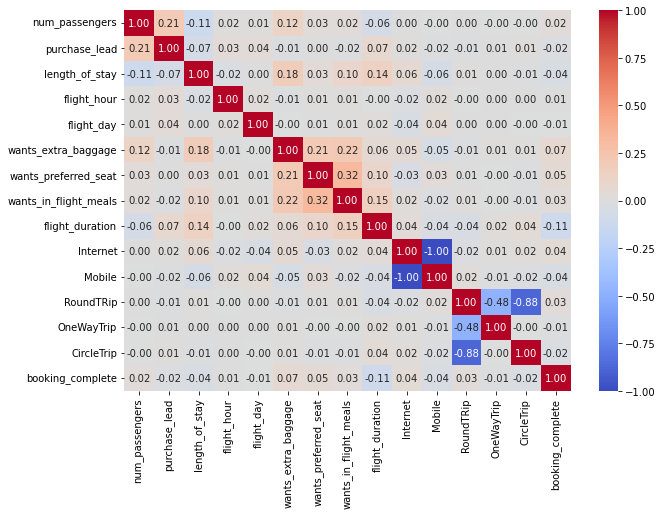

In [18]:
correlation = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(correlation, annot=True, fmt='.2f',cmap='coolwarm')
#sns.heatmap(corr)
plt.show()

# Logistic Regression

In [19]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import StandardScaler
# from sklearn.exceptions import ConvergenceWarning
# from sklearn.model_selection import train_test_split
# import warnings
# from sklearn.model_selection import train_test_split

# x = scaled_df.iloc[:,:-1]
# y = booking_complete
# x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(),y.to_numpy(),test_size=0.20,random_state=42)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning)
#     lr = LogisticRegression(max_iter=1000, solver='lbfgs')
#     lr.fit(x_train, y_train)
# predictions = lr.predict(x_test)
# confusion_mat=confusion_matrix(y_test,predictions)
# accuracy=accuracy_score(y_test,predictions)
# print("Accuracy:", accuracy)
# print("Confusion matrix:\n", confusion_mat)
# from prettytable import PrettyTable
# from sklearn.metrics import precision_recall_fscore_support
# precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, zero_division=1)
# precision, recall, f1_score, support

# table = PrettyTable()
# table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

# # add data to table
# for i in range(len(support)):
#     table.add_row([i, precision[i], recall[i], f1_score[i], support[i]])

# # print table
# print(table)

# Splitting Train and Test Data & Random Forest Classifier

In [20]:
from sklearn.model_selection import train_test_split
x = scaled_df.iloc[:,:-1]
y =booking_complete
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(),y.to_numpy(),test_size=0.30,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [22]:
def model_fit_predict(model, x, y, x_predict):
    model.fit(x, y)
    return model.predict(x_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [23]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [24]:
y_pred_train = model_fit_predict(clf_rf, x_train, y_train, x_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9336674443388346

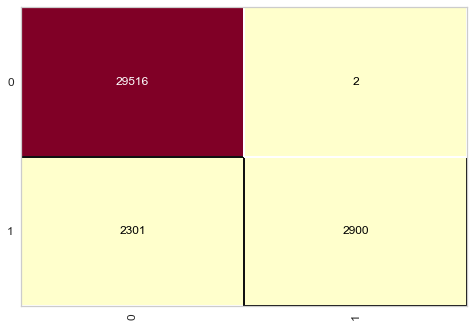

In [25]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_train, y_train)

# Checking Testing accuracy

In [26]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, x_train, y_train, x_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.48 and 0.06 respectively


0.8498655913978495

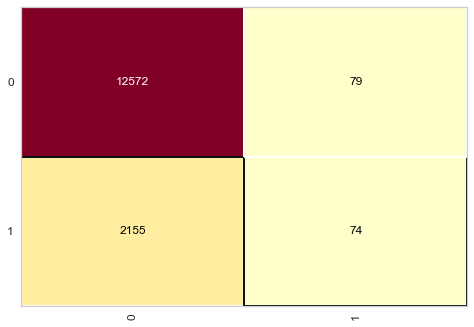

In [27]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

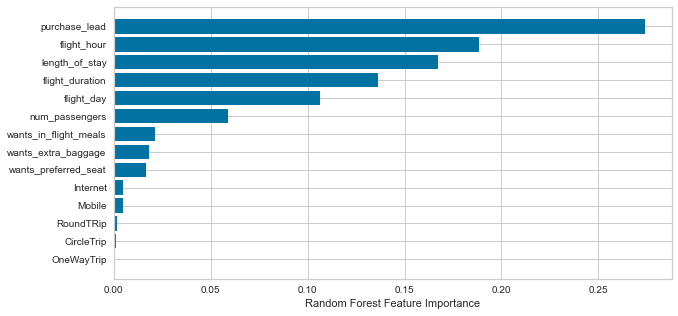

In [28]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One significant reason for a low F1 score is an imbalanced dataset. We have more entries categorized as 0 than 1. We could reduce the number of entries classified as 0 to be roughly equal to the number of entries categorized as 1.

# Balancing the dataset

In [29]:
scaled_df.booking_complete.value_counts()

0    42169
1     7430
Name: booking_complete, dtype: int64

In [30]:
#create a dataframe having all booking_complete 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.booking_complete ==0].sample(n=7000)

In [31]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.booking_complete==1], scaled_df_0], ignore_index=True)

In [32]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [33]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,booking_complete
0,-0.576788,-0.482515,-0.563877,-0.196171,-0.911623,0.701469,-0.651302,-0.865430,-0.439039,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1
1,-0.576788,-0.658249,-0.563877,0.728531,1.099679,0.701469,-0.651302,-0.865430,-0.185440,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1
2,-0.576788,-0.951140,-0.063385,-0.935934,1.602505,0.701469,-0.651302,-0.865430,-1.687009,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
3,-0.576788,-0.904277,-0.622758,-0.011231,1.602505,-1.425580,-0.651302,-0.865430,-0.185440,-2.811524,2.811524,0.101117,-0.048417,-0.088563,0
4,-0.576788,-0.587955,-0.151707,0.543591,-0.911623,-1.425580,1.535386,-0.865430,-1.106403,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14425,-0.576788,-0.716827,1.820820,-0.381112,-0.911623,0.701469,-0.651302,-0.865430,1.035836,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1
14426,-0.576788,-0.107615,-0.004503,-0.566053,0.094028,0.701469,-0.651302,-0.865430,0.868995,0.355679,-0.355679,0.101117,-0.048417,-0.088563,0
14427,-0.576788,-0.927708,-0.593318,2.392997,-0.408797,0.701469,-0.651302,-0.865430,-1.740399,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1
14428,-0.576788,-0.787121,0.142700,-0.381112,1.602505,-1.425580,-0.651302,-0.865430,1.035836,0.355679,-0.355679,0.101117,-0.048417,-0.088563,1


In [34]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [35]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [36]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.63, 0.65, 0.64, 0.62 and 0.65 respectively


0.6337491337491338

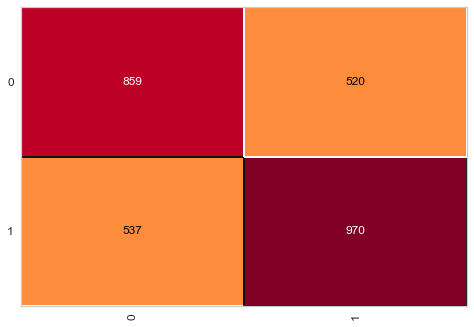

In [37]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

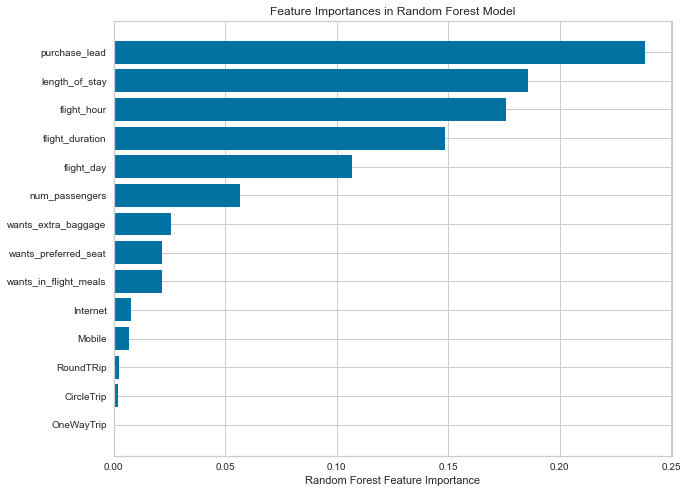

In [38]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances in Random Forest Model")
plt.savefig('Feature Importances in Random Forest Model', dpi=300, bbox_inches='tight')
plt.show()